In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [5]:
data = pd.read_csv("E:/Data Mining/data_breast_cancer2.csv")

In [7]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

<function matplotlib.pyplot.show>

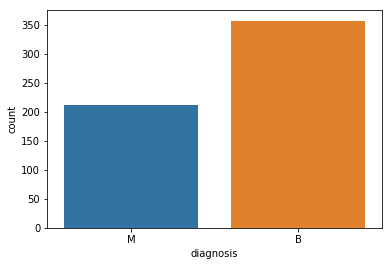

In [9]:
sns.countplot(x=data['diagnosis'])
plt.show

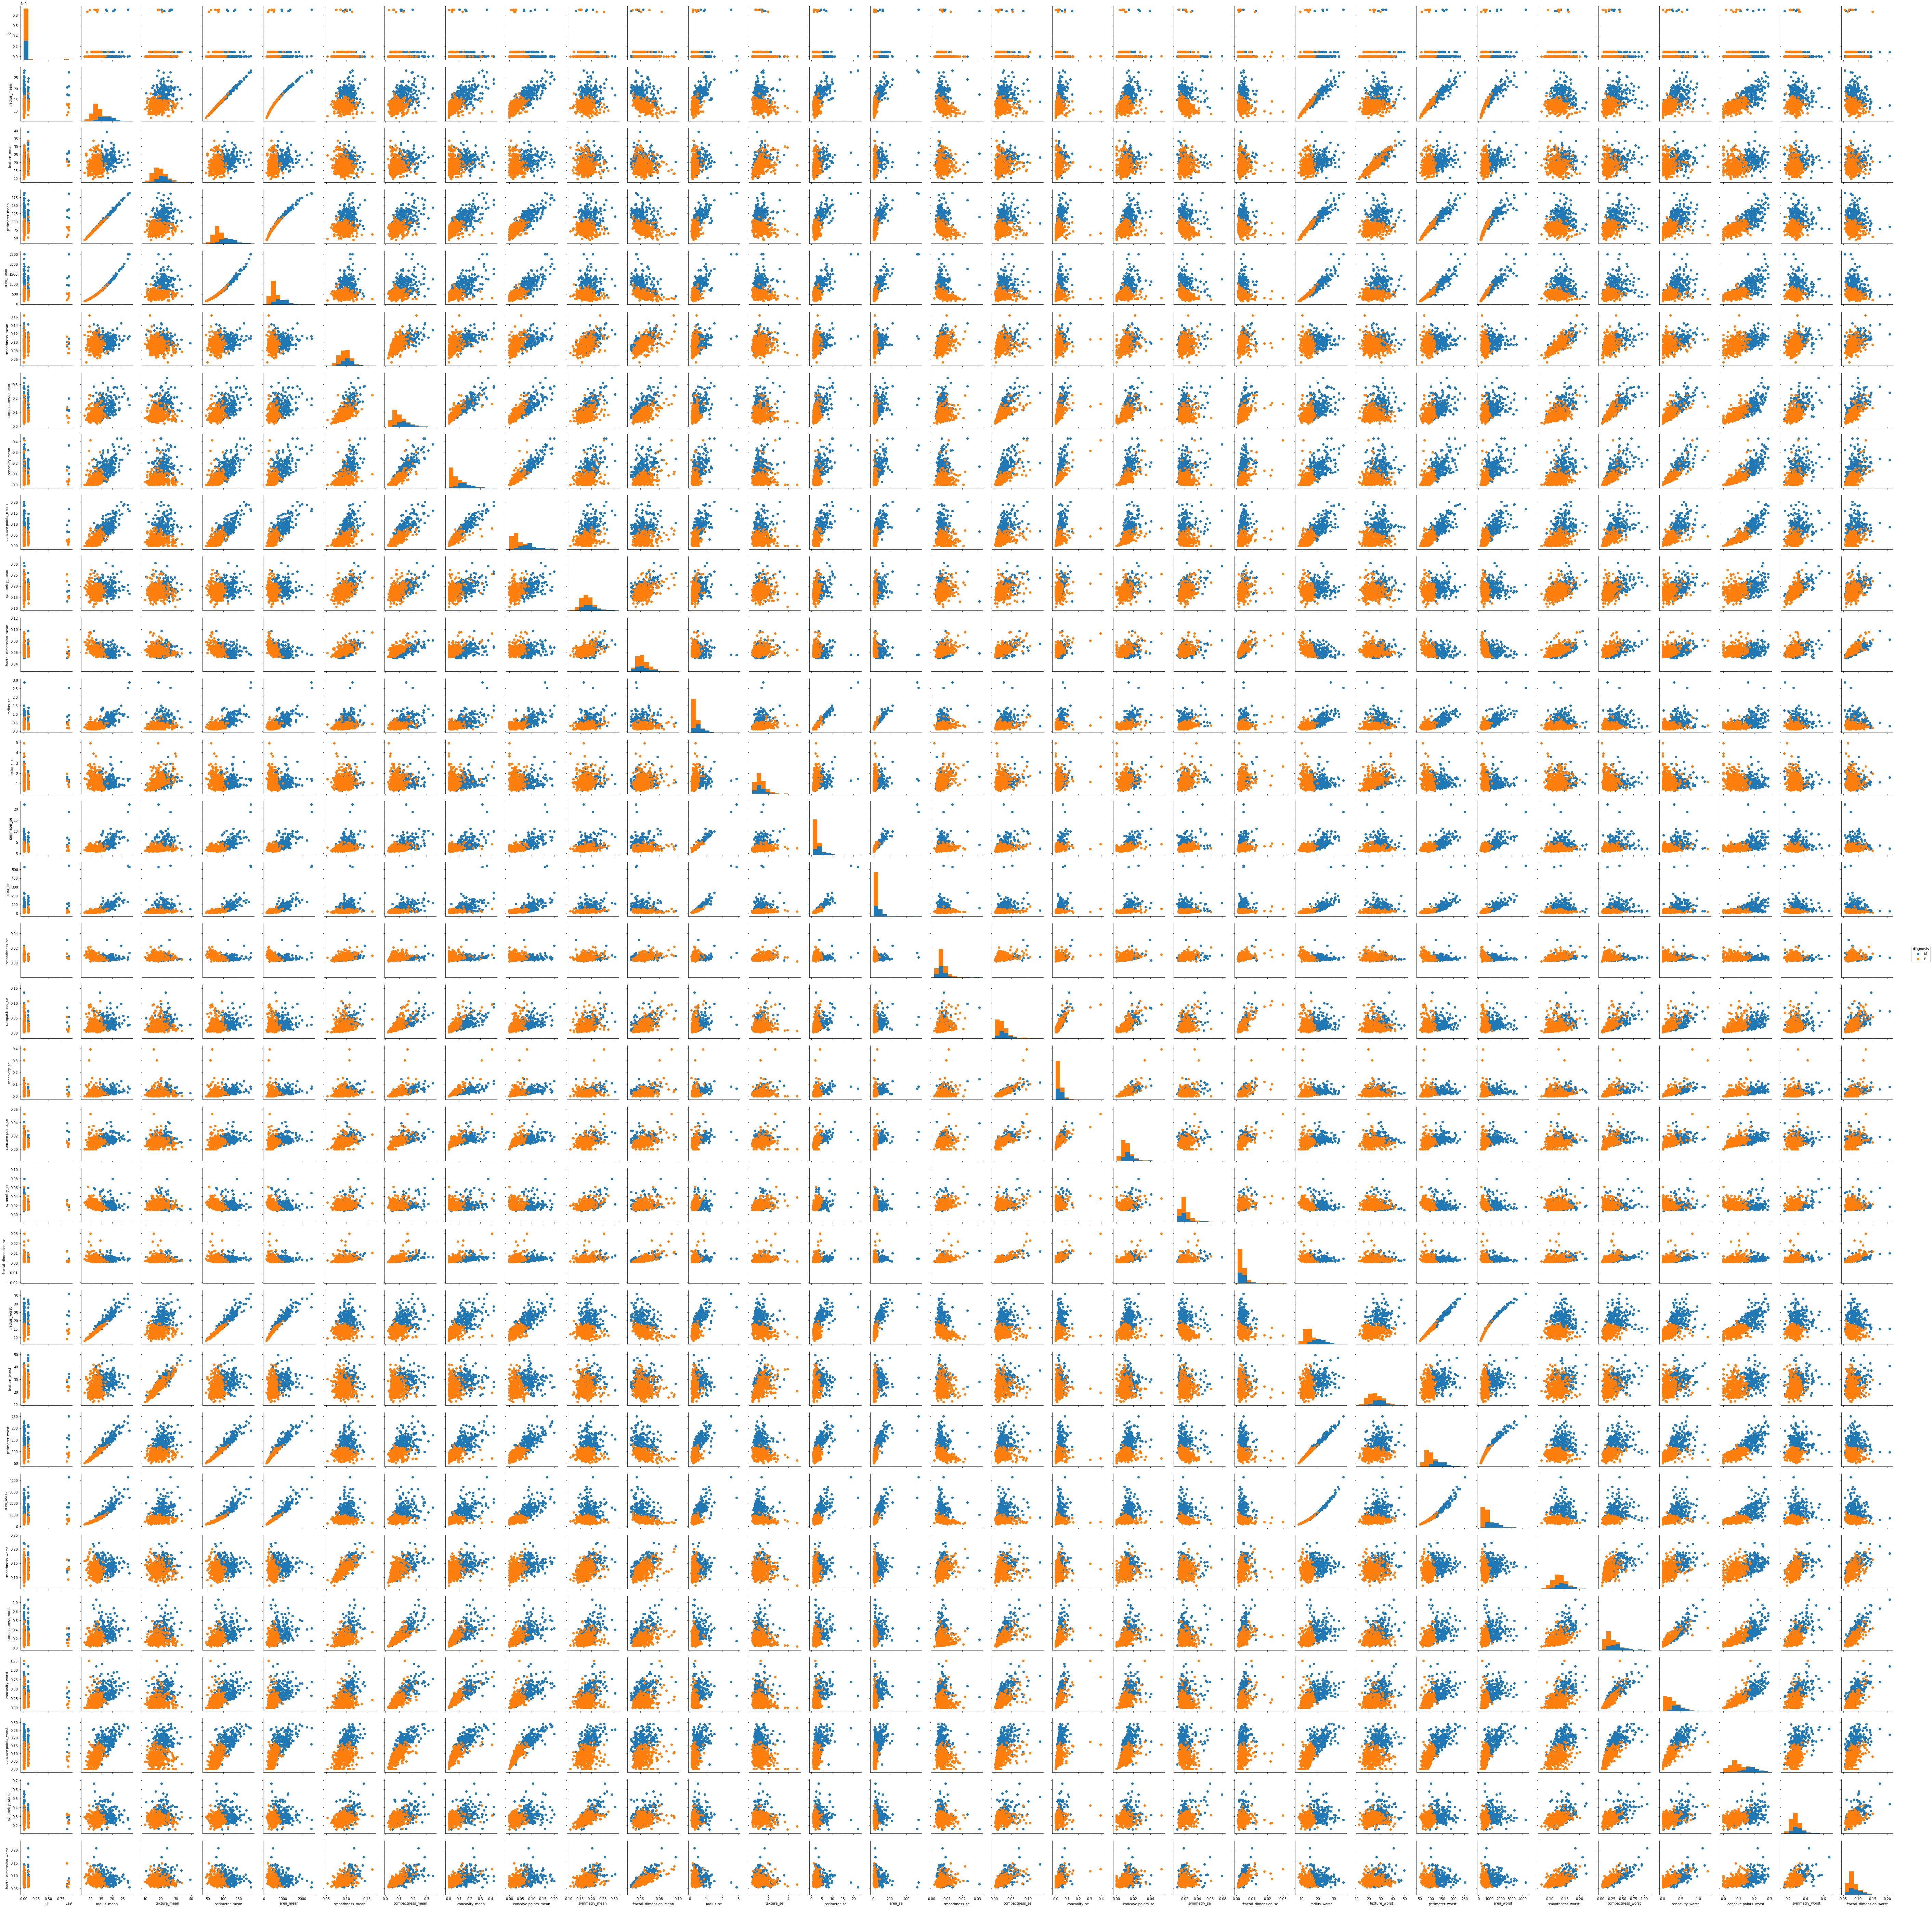

In [10]:
g = sns.PairGrid(data,hue="diagnosis")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

## Encode

In [21]:
from sklearn.preprocessing import LabelEncoder
data['diagnosis'] = LabelEncoder().fit_transform(data['diagnosis'])
data.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

## Split Train Test

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
y = data['diagnosis']
x = data.drop(['diagnosis','id'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=123)

## Reglog

In [25]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0)
model = lg.fit(x_train,y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
lg.score(x_train, y_train)

0.9516483516483516

In [30]:
lg_predict = lg.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve

In [31]:
conf_matrix = confusion_matrix(y_test,lg_predict)
print(conf_matrix)

[[73  0]
 [ 2 39]]


In [32]:
classes = data['diagnosis'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=classes, index=classes)

In [33]:
conf_matrix_df

1   0
1  73   0
0   2  39

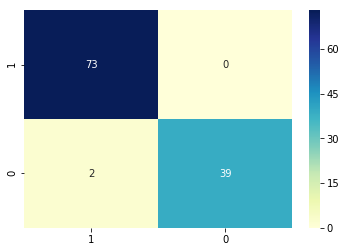

In [34]:
sns.heatmap(conf_matrix_df, annot=True, cmap="YlGnBu")
plt.show()

In [35]:
y_test.to_excel("breast_canc_excel.xlsx")

In [59]:
akurasi = accuracy_score(y_test, lg_predict)
presisi = precision_score(y_test, lg_predict)
recall = recall_score(y_test, lg_predict)

In [60]:
akurasi

0.9824561403508771

In [61]:
presisi

1.0

In [62]:
recall

0.9512195121951219

## Discriminant

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
dis = LinearDiscriminantAnalysis()
dis.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [41]:
dis.score(x_train,y_train)

0.9604395604395605

In [43]:
dis_predict = dis.predict(x_test)

In [45]:
conf_matrix = confusion_matrix(y_test,dis_predict)
print(conf_matrix)

[[73  0]
 [ 3 38]]


In [48]:
classes = data['diagnosis'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=classes, index=classes)
conf_matrix_df

1   0
1  73   0
0   3  38

In [53]:
akurasi_dis = accuracy_score(y_test, dis_predict)
presisi_dis = precision_score(y_test, dis_predict)
recall_dis = recall_score(y_test, dis_predict)

In [54]:
akurasi_dis

0.9736842105263158

In [55]:
presisi_dis

1.0

In [56]:
recall_dis

0.926829268292683

In [57]:
fpr, tpr, threshold = roc_curve(y_test, dis_predict)
auc = auc(fpr, tpr)
print("auc = ", auc)

auc =  0.9634146341463414


## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
rf.score(x_train, y_train)

0.9934065934065934

In [75]:
rf_predict = rf.predict(x_test)

In [76]:
conf_matrix = confusion_matrix(y_test,rf_predict)
print(conf_matrix)

[[72  1]
 [ 1 40]]


In [77]:
classes = data['diagnosis'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=classes, index=classes)
conf_matrix_df

1   0
1  72   1
0   1  40

In [78]:
akurasi_rf = accuracy_score(y_test, rf_predict)
presisi_rf = precision_score(y_test, rf_predict)
recall_rf = recall_score(y_test, rf_predict)

In [79]:
print(akurasi_rf)
print(presisi_rf)
print(recall_rf)

0.9824561403508771
0.975609756097561
0.975609756097561
